In [1]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
# 因为后面稀疏矩阵的建立无法承受很大维度的，因此这里切割是为了缩小矩阵
df = df.ix[:40000,:]

D:\anacoda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [2]:
df.shape

(40001, 18)

## 去除空的

In [3]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3,03/04/2016,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726
7,03/03/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,On XX/XX/18 an item showed up on my credit rep...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,245XX,NaN,Consent provided,Web,03/03/2018,Closed with explanation,Yes,NaN,2831821
8,01/02/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,Saw on my credit report that there is a collec...,Company believes complaint caused principally ...,"Cascade Capital, LLC",FL,334XX,Older American,Consent provided,Web,01/18/2019,Closed with explanation,Yes,NaN,3114357
9,12/23/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Capital one auto finacing XX/XX/2018 unknown i...,NaN,CAPITAL ONE FINANCIAL CORPORATION,MD,212XX,NaN,Consent provided,Web,12/23/2018,Closed with explanation,Yes,NaN,3108212
11,04/13/2018,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I own a small trucking company. One of my truc...,NaN,TD BANK US HOLDING COMPANY,NJ,NaN,NaN,Consent provided,Web,04/16/2018,Closed with monetary relief,Yes,NaN,2874325


In [5]:
df.shape

(12633, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12633 entries, 3 to 39998
Data columns (total 18 columns):
Date received                   12633 non-null object
Product                         12633 non-null object
Sub-product                     11031 non-null object
Issue                           12633 non-null object
Sub-issue                       9205 non-null object
Consumer complaint narrative    12633 non-null object
Company public response         6060 non-null object
Company                         12633 non-null object
State                           12586 non-null object
ZIP code                        9774 non-null object
Tags                            2123 non-null object
Consumer consent provided?      12633 non-null object
Submitted via                   12633 non-null object
Date sent to company            12633 non-null object
Company response to consumer    12633 non-null object
Timely response?                12633 non-null object
Consumer disputed?             

In [7]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df.head()

,Product,Consumer complaint narrative
3,Credit card,I am dissatisfied with the current outcome of ...
7,"Credit reporting, credit repair services, or o...",On XX/XX/18 an item showed up on my credit rep...
8,Debt collection,Saw on my credit report that there is a collec...
9,"Credit reporting, credit repair services, or o...",Capital one auto finacing XX/XX/2018 unknown i...
11,Credit card or prepaid card,I own a small trucking company. One of my truc...


In [8]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [9]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [10]:
df.columns

Index(['Product', 'Consumer_complaint_narrative'], dtype='object')

In [11]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [12]:
df.head()

,Product,Consumer_complaint_narrative,category_id
3,Credit card,I am dissatisfied with the current outcome of ...,0
7,"Credit reporting, credit repair services, or o...",On XX/XX/18 an item showed up on my credit rep...,1
8,Debt collection,Saw on my credit report that there is a collec...,2
9,"Credit reporting, credit repair services, or o...",Capital one auto finacing XX/XX/2018 unknown i...,1
11,Credit card or prepaid card,I own a small trucking company. One of my truc...,3


In [13]:
category_id_df.head()

,Product,category_id
3,Credit card,0
7,"Credit reporting, credit repair services, or o...",1
8,Debt collection,2
11,Credit card or prepaid card,3
14,Mortgage,4


In [14]:
category_to_id

{'Credit card': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Debt collection': 2,
 'Credit card or prepaid card': 3,
 'Mortgage': 4,
 'Bank account or service': 5,
 'Credit reporting': 6,
 'Student loan': 7,
 'Checking or savings account': 8,
 'Vehicle loan or lease': 9,
 'Consumer Loan': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Money transfers': 12,
 'Payday loan': 13,
 'Payday loan, title loan, or personal loan': 14,
 'Other financial service': 15,
 'Prepaid card': 16}

In [15]:
id_to_category

{0: 'Credit card',
 1: 'Credit reporting, credit repair services, or other personal consumer reports',
 2: 'Debt collection',
 3: 'Credit card or prepaid card',
 4: 'Mortgage',
 5: 'Bank account or service',
 6: 'Credit reporting',
 7: 'Student loan',
 8: 'Checking or savings account',
 9: 'Vehicle loan or lease',
 10: 'Consumer Loan',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Money transfers',
 13: 'Payday loan',
 14: 'Payday loan, title loan, or personal loan',
 15: 'Other financial service',
 16: 'Prepaid card'}

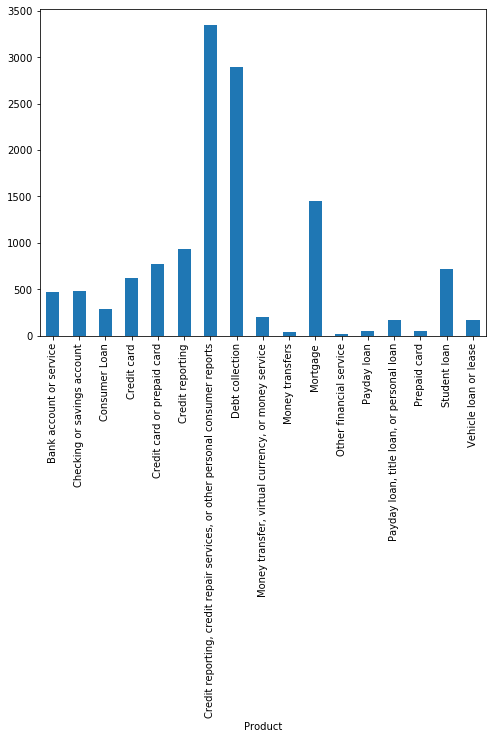

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

### 词袋模型化，转成TFIDF表示

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')


In [18]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative)

In [19]:
features.shape

(12633, 33769)

In [20]:
len(tfidf.get_feature_names())

33769

In [21]:
tfidf.get_feature_names()

['00',
 '00 00',
 '00 10',
 '00 100',
 '00 1000',
 '00 10000',
 '00 11',
 '00 110',
 '00 12',
 '00 1200',
 '00 14',
 '00 15',
 '00 150',
 '00 1500',
 '00 160',
 '00 170',
 '00 1700',
 '00 19',
 '00 20',
 '00 200',
 '00 22',
 '00 2200',
 '00 240',
 '00 25',
 '00 250',
 '00 30',
 '00 300',
 '00 3000',
 '00 320',
 '00 35',
 '00 350',
 '00 390',
 '00 400',
 '00 420',
 '00 450',
 '00 490',
 '00 50',
 '00 500',
 '00 60',
 '00 700',
 '00 90',
 '00 able',
 '00 accepted',
 '00 according',
 '00 account',
 '00 accounts',
 '00 acct',
 '00 accurate',
 '00 actually',
 '00 added',
 '00 addition',
 '00 additional',
 '00 advance',
 '00 advised',
 '00 afford',
 '00 agreed',
 '00 allowed',
 '00 ally',
 '00 annual',
 '00 annually',
 '00 applied',
 '00 appraisal',
 '00 approved',
 '00 approximately',
 '00 asked',
 '00 atm',
 '00 attached',
 '00 attorney',
 '00 auto',
 '00 available',
 '00 balance',
 '00 bank',
 '00 based',
 '00 believe',
 '00 billed',
 '00 bonus',
 '00 borrowed',
 '00 bring',
 '00 business

In [22]:
labels = df.category_id

In [23]:
labels.head()

3     0
7     1
8     2
9     1
11    3
Name: category_id, dtype: int64

In [24]:
features = features.toarray()

In [25]:
features

array([[0.03083787, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06247266, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05181324, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 特征选择

In [26]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2

In [27]:
for Product, category_id in sorted(category_to_id.items()):
    # 卡方分布的特征筛选，通过每一层目标确认
    features_chi2 = chi2(features, labels == category_id)
    # argsort从小到大的索引
    indices = np.argsort(features_chi2[0])
#     print(indices)
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# 'Bank account or service':
  . Most correlated unigrams:
       . bank
       . overdraft
  . Most correlated bigrams:
       . checking account
       . overdraft fees
# 'Checking or savings account':
  . Most correlated unigrams:
       . bank
       . checking
  . Most correlated bigrams:
       . savings account
       . checking account
# 'Consumer Loan':
  . Most correlated unigrams:
       . vehicle
       . car
  . Most correlated bigrams:
       . chrysler capital
       . loan santander
# 'Credit card':
  . Most correlated unigrams:
       . macy
       . card
  . Most correlated bigrams:
       . synchrony bank
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . purchases
       . card
  . Most correlated bigrams:
       . balance transfer
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . equifax
       . experian
  . Most correlated bigrams:
       . possible thank
       . disputed resolve
# 'Credit

In [28]:
# 划分

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [30]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

In [31]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [32]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [33]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [34]:
print(clf.predict(tfidf_transformer.transform(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]))))

['Debt collection']


In [35]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


In [36]:
print(clf.predict(tfidf_transformer.transform(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]))))

['Credit reporting, credit repair services, or other personal consumer reports']


In [37]:
print(clf.predict(tfidf_transformer.transform(count_vect.transform(["I have a paid and satisfied Ga tax state lien that has been released on XX/XX/2017 from the XXXX XXXX XXXX XXXX. I have submitted the information over to all credit bureaus, XXXX, XXXX, and Equifax. All bureaus besides Equifax have released and removed the lien from my credit report. I have called Equifax on several occasions to se reason on why they wont remove this lien from my report."]))))

['Credit reporting, credit repair services, or other personal consumer reports']


In [38]:
df[df['Consumer_complaint_narrative'] == "I have a paid and satisfied Ga tax state lien that has been released on XX/XX/2017 from the XXXX XXXX XXXX XXXX. I have submitted the information over to all credit bureaus, XXXX, XXXX, and Equifax. All bureaus besides Equifax have released and removed the lien from my credit report. I have called Equifax on several occasions to se reason on why they wont remove this lien from my report."]

,Product,Consumer_complaint_narrative,category_id
89,"Credit reporting, credit repair services, or o...",I have a paid and satisfied Ga tax state lien ...,1


In [39]:
print(clf.predict(tfidf_transformer.transform(count_vect.transform(["""I am filing this complaint because ChexSystems has demonstrated some seriously broken " investigative '' processes of consumer initiated disputes. ChexSystems does not follow a well articulated investigative process, but instead launch " re-investigations '' on their own accord without the consumers request, that yield differing results than prior investigations. They refuse to provide information to consumers that substantiate the outcome of their investigations. Sadly, Chex also adds inaccurate information to consumer files at the whim of their broken administrative processes. 

ChexSystems absolves themselves of any responsibility for the accuracy of information contained in their systems, but instead casts responsibility to their customers, and forces the consumer to address problems directly with ChexSystems customers, unless providing a police report. Unfortunately some police agencies do n't issue " police reports '' when a crime has not been clearly consummated. In some cases a consumer may want to guard against the release of accurate consumer information to prevent perpetuating additional fraud. 

Having gone through investigations with XXXX other Credit Reporting Agencies over the same set of fraudulent inquiries without a " police report '', ALL of the interactions with other Credit Reporting Agencies were consumer friendly, were well defined, were conducted in a professional manner without putting personal information at risk, did not require " re-investigations '', and resulted in the complete removal of all fraudulent and inaccurate information in my consumer file at their firms. 

Details of the interactions with ChexSystems are contained in the attached file. ChexSystems does not provide direct contact information to a consumer to consult directly with a ChexSystems employee. Every communication sent from ChexSystems is sent to the consumer anonymously."""]))))

['Credit reporting, credit repair services, or other personal consumer reports']


In [40]:
df[df['Consumer_complaint_narrative'] == """I am filing this complaint because ChexSystems has demonstrated some seriously broken " investigative '' processes of consumer initiated disputes. ChexSystems does not follow a well articulated investigative process, but instead launch " re-investigations '' on their own accord without the consumers request, that yield differing results than prior investigations. They refuse to provide information to consumers that substantiate the outcome of their investigations. Sadly, Chex also adds inaccurate information to consumer files at the whim of their broken administrative processes. 

ChexSystems absolves themselves of any responsibility for the accuracy of information contained in their systems, but instead casts responsibility to their customers, and forces the consumer to address problems directly with ChexSystems customers, unless providing a police report. Unfortunately some police agencies do n't issue " police reports '' when a crime has not been clearly consummated. In some cases a consumer may want to guard against the release of accurate consumer information to prevent perpetuating additional fraud. 

Having gone through investigations with XXXX other Credit Reporting Agencies over the same set of fraudulent inquiries without a " police report '', ALL of the interactions with other Credit Reporting Agencies were consumer friendly, were well defined, were conducted in a professional manner without putting personal information at risk, did not require " re-investigations '', and resulted in the complete removal of all fraudulent and inaccurate information in my consumer file at their firms. 

Details of the interactions with ChexSystems are contained in the attached file. ChexSystems does not provide direct contact information to a consumer to consult directly with a ChexSystems employee. Every communication sent from ChexSystems is sent to the consumer anonymously."""]

,Product,Consumer_complaint_narrative,category_id
148,Credit reporting,I am filing this complaint because ChexSystems...,6


#### 模型选择

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [42]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5

In [43]:
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [44]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

D:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

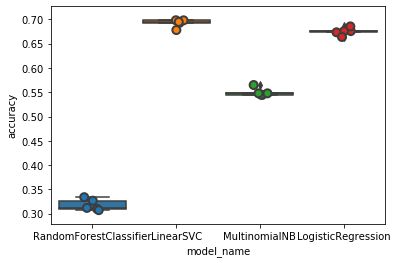

In [45]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [46]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.692383
LogisticRegression        0.674890
MultinomialNB             0.549989
RandomForestClassifier    0.317962
Name: accuracy, dtype: float64

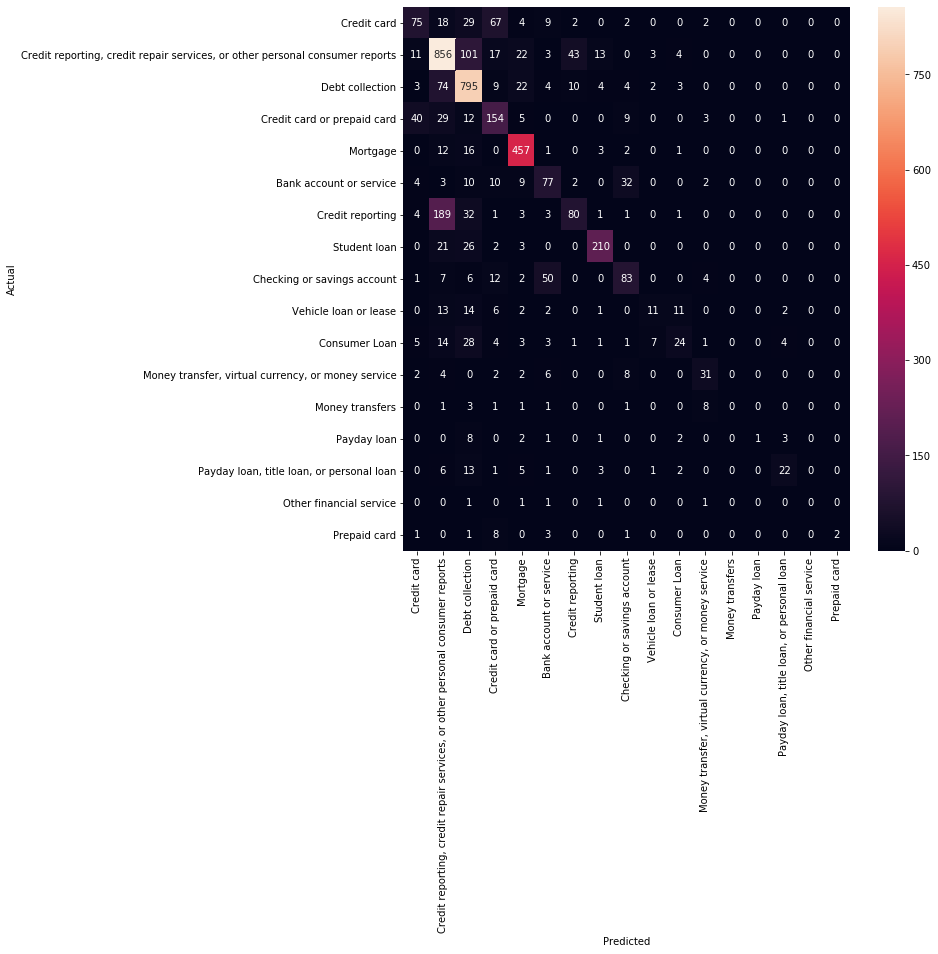

In [47]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features,
 labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, 
yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 错误分析

In [48]:
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
            print('')

'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 11 examples.


,Product,Consumer_complaint_narrative
23783,"Credit reporting, credit repair services, or o...",Dear CFPB. on Saturday XXXX XXXX 2017...
16152,"Credit reporting, credit repair services, or o...","Hello, I am the holder of a Chase XXXX XXXX XX..."
33185,"Credit reporting, credit repair services, or o...",a discover card balance on my report is not mi...
27572,"Credit reporting, credit repair services, or o...",I have been receiving letters from Citibank st...
35403,"Credit reporting, credit repair services, or o...",I had a hard inquiry for a credit card at Walm...
12826,"Credit reporting, credit repair services, or o...",My American Express show late payment I called...
12525,"Credit reporting, credit repair services, or o...",Thank you for taking the time to read this let...
12822,"Credit reporting, credit repair services, or o...",The compliant is with Citibank whom I never op...
33139,"Credit reporting, credit repair services, or o...",Transunion credit bureau is not reporting 5 cr...
20725,"Credit reporting, credit repair services, or o...",My XXXX credit credit card account which was...



'Credit card or prepaid card' predicted as 'Credit card' : 40 examples.


,Product,Consumer_complaint_narrative
21195,Credit card or prepaid card,I am an XXXX XXXX military XXXX serving in the...
7754,Credit card or prepaid card,While booking a delta flight on XX/XX/2017 I s...
28916,Credit card or prepaid card,I have a applied for this company through XXXX...
8882,Credit card or prepaid card,"I applied for a XXXX XXXX credit card, issued ..."
37716,Credit card or prepaid card,When i try to credit my american express blue ...
9772,Credit card or prepaid card,onXX/XX/2017. I received a statement saying th...
3751,Credit card or prepaid card,Yesterday I received a bill in the mail from m...
30745,Credit card or prepaid card,I was shocked when I reviewed my credit report...
8589,Credit card or prepaid card,Sears Card. Sears did not answer when I disput...
6670,Credit card or prepaid card,"Hi there, Citicards has increased the interest..."



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 18 examples.


,Product,Consumer_complaint_narrative
33472,Credit card,My Amex account holder information was hacked ...
7224,Credit card,I want to open a complaint against the followi...
8745,Credit card,If I had n't been given incorrect information ...
9135,Credit card,Ref : Bank of AmericaI have been working with ...
8963,Credit card,Dillards department stores identity theieves a...
20981,Credit card,Received a refund check for a credit on a cred...
6591,Credit card,"On Thursday, XXXX XXXX, I received a call that..."
28797,Credit card,this company continued inaccurate balance and ...
39089,Credit card,I previously complained about Discover 's webs...
21167,Credit card,I have repeatedly Tried to get the First Natio...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 74 examples.


,Product,Consumer_complaint_narrative
6001,Debt collection,"XXXX Law Dictionary, 9th Edition, 2009, define..."
8244,Debt collection,Sent two letters asking for verification of tw...
30411,Debt collection,Collection was added to my credit report by XX...
21859,Debt collection,AD ASTRA Recovery Services refuses to delete a...
2952,Debt collection,There are 2 outstanding bills from XX/XX/XXXX ...
3159,Debt collection,after viewing my credit report in XXX 2017 i ...
11431,Debt collection,I am continuing to receive calls from this com...
33104,Debt collection,XXXX is reporting a XXXX reposession on my cr...
10398,Debt collection,This account is not mine. I was a victim of id...
18404,Debt collection,"do not know why this is on my cr report, do no..."



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 29 examples.


,Product,Consumer_complaint_narrative
36948,Credit card or prepaid card,Closed my account : XX/XX/XXXX Amount : Entire...
9205,Credit card or prepaid card,"XXXX XXXX has "" Zero '' Integrity and needs to..."
19536,Credit card or prepaid card,On these dates things was purchased that I was...
5109,Credit card or prepaid card,"On the XX/XX/2018, I purchased a product from ..."
11829,Credit card or prepaid card,I have been going through a severe financial h...
3240,Credit card or prepaid card,I have had issues with this company since the ...
37447,Credit card or prepaid card,"I spoke with American Express on Tuesday, XXXX..."
36243,Credit card or prepaid card,I got a letter stating all your Citi credit ca...
10586,Credit card or prepaid card,Equifax has been non-compliant with removing t...
19439,Credit card or prepaid card,On XX/XX/XXXX I received an email alert from U...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 12 examples.


,Product,Consumer_complaint_narrative
11618,Mortgage,Official looking mailing received ( from TRU M...
1043,Mortgage,On XXXX XXXX 2017 underwriters at Michigan Mut...
25077,Mortgage,JPMorgan Chase keeps sending bogus letters wit...
15484,Mortgage,My mortgage company is reporting false informa...
2139,Mortgage,Loan Care is erroneously reporting 60 day late...
17974,Mortgage,I setup a payment online as I made previous pa...
29754,Mortgage,This is related to case # XXXX. I have a mortg...
20108,Mortgage,This is a new Care ( THIS IS A NEW CASE ) Back...
36011,Mortgage,I refinanced a mortgage for a single family re...
31789,Mortgage,LOAN NUMBER XXXX FIRST ISSUE IS THEIR BUSINESS...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 189 examples.


,Product,Consumer_complaint_narrative
11454,Credit reporting,XXXX is reporting to ( Experian ) which they h...
20839,Credit reporting,I am writing to dispute the status and terms o...
23211,Credit reporting,I have XXXX accounts from XXXX XXXX XXXX repor...
9694,Credit reporting,I have been a victim of identity theft and my ...
7689,Credit reporting,Since XXXX/XXXX/2015 I have attempted to pull ...
37685,Credit reporting,A credit card that I believe I once had but wa...
12472,Credit reporting,"XXXX XXXX XXXX, TX XXXX ( XXXX ) XXXX Account ..."
31748,Credit reporting,THERE IS A WRONG SOCIAL SECURITY NUMBER WITH E...
753,Credit reporting,I mailed a second dispute letter and proof of ...
33715,Credit reporting,"XXXX could not validate these accounts, Equifa..."



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 21 examples.


,Product,Consumer_complaint_narrative
23700,Student loan,"In XX/XX/XXXX, my old Perkins Loan from XX/XX/..."
6850,Student loan,I have a loan with XXXX. I have always made my...
33356,Student loan,XX/XX/2018 Funds withheld from my payroll by X...
31315,Student loan,HELLO. I WOULD SOME INFO.HOW I CAN GET SOME HE...
16593,Student loan,The information that is being reported on my s...
24990,Student loan,"Once again, I go onto your Website to download..."
25495,Student loan,The two ab ove accounts where removed off all ...
4229,Student loan,The added late payments to my account and I su...
2433,Student loan,I was using the suggested deferment options an...
20994,Student loan,Great Lakes has my repay date wrong and it nee...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 7 examples.


,Product,Consumer_complaint_narrative
31407,Checking or savings account,On XX/XX/XXXX I had three debits from my accou...
5566,Checking or savings account,On XX/XX/XXXX I opened my account at BB & T an...
7455,Checking or savings account,"On XX/XX/XXXX, Mon. about XXXXXXXX XXXX. I ope..."
36703,Checking or savings account,"PNC is my bank, and they are not SHOWING THE C..."
16291,Checking or savings account,I tried accessing my account and it says that ...
35847,Checking or savings account,I received a letter in the mail saying my addr...
31349,Checking or savings account,"Dear CFPB Investigator, How are you? \n\nThe r..."



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


,Product,Consumer_complaint_narrative
14907,Vehicle loan or lease,ON THE LAST XXXX XXXX PAYMENT OF OUR XX/XX/XX...
3166,Vehicle loan or lease,Complaint : Posted check to closed account # X...
10561,Vehicle loan or lease,I began to get behind on my car payments in XX...
10622,Vehicle loan or lease,I purchased a car from a XXXX dealership and o...
4951,Vehicle loan or lease,I pulled a copy of my credit report from all t...
9829,Vehicle loan or lease,My brand new XXXX XXXX ended up a total loss X...
38946,Vehicle loan or lease,I'm am a United States Army soldier currently ...
7900,Vehicle loan or lease,I have had a situation where my car was alread...
16197,Vehicle loan or lease,"In the latter part of 2017, I discovered I had..."
37753,Vehicle loan or lease,There are two reporting errors on my current l...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 14 examples.


,Product,Consumer_complaint_narrative
32012,Consumer Loan,"After turning in my car, I received a bill tha..."
29997,Consumer Loan,Nissan-Infiniti LT is repo rting my account la...
37016,Consumer Loan,I received a car loan in XX/XX/XXXX. It was co...
14469,Consumer Loan,My account with this company charged off the t...
20587,Consumer Loan,I recently received a copy of my XXXX credit r...
19249,Consumer Loan,I purchased a Motorcycle using HDFS in XX/XX/X...
39557,Consumer Loan,Auto loan with Suntrust Bank. Original Loan am...
16974,Consumer Loan,Infiniti / Nissan finance offers a lease trans...
26493,Consumer Loan,False Reporting Investigation Reinvestigation ...
34093,Consumer Loan,"Loan has been paid in full and as agreed, but ..."



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
14555,"Payday loan, title loan, or personal loan",MY NAME IS XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...
20736,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I submitted a Payment for the fi...
29819,"Payday loan, title loan, or personal loan",I am engaging the CFPB to report that Greensky...
18090,"Payday loan, title loan, or personal loan",Was interested in refinancing my vehicle ( XX/...
21634,"Payday loan, title loan, or personal loan","On or about XX/XX/2018, I had inquired on line..."
3954,"Payday loan, title loan, or personal loan",At the end of XX/XX/XXXX I advised personal Fi...



'Credit card' predicted as 'Debt collection' : 29 examples.


,Product,Consumer_complaint_narrative
39337,Credit card,"XXXX XXXX, XXXX I opened a XXXX credit card. O..."
26520,Credit card,A guy I was dating XXXX XXXX stoled my identit...
1096,Credit card,I had a credit card with XXXX gas. I paid it o...
416,Credit card,I have submitted a complaint against Citibank ...
14797,Credit card,I paid off my credit card via a third party ag...
29005,Credit card,This credit card company Capital One/Best Buy ...
39374,Credit card,My fiance spoke on my behalf to the customer s...
29752,Credit card,I am writing in regard to Discover Financial S...
19705,Credit card,I have been trying to pay this debt that I owe...
36773,Credit card,Being charge for non-payment fees and accused ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 101 examples.


,Product,Consumer_complaint_narrative
8504,"Credit reporting, credit repair services, or o...",XXXX IS REPORTING ON MY CREDIT FILE THAT I OWE...
26758,"Credit reporting, credit repair services, or o...",I am not an active credit user. I am a respons...
2524,"Credit reporting, credit repair services, or o...",This vehicle was repossessed by Prestige Finan...
21947,"Credit reporting, credit repair services, or o...",Ive sent Midland Credit Management numerous le...
7038,"Credit reporting, credit repair services, or o...",a check for a co pay of XXXX was sent to hospi...
13572,"Credit reporting, credit repair services, or o...",This is being sent in response to notices sent...
4380,"Credit reporting, credit repair services, or o...",I've tried to settle this matter several times...
36828,"Credit reporting, credit repair services, or o...",This company charged me an high interests and ...
25323,"Credit reporting, credit repair services, or o...",[Letter # 4] XXXX XXXX XXXX XXXX XXXX XXXX XXX...
29032,"Credit reporting, credit repair services, or o...",I have 3 things on my credit report that I wan...



'Credit card or prepaid card' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
20731,Credit card or prepaid card,In XX/XX/2017 I requested my billing address b...
19412,Credit card or prepaid card,"On XX/XX/XXXX, with no prior notice given, I r..."
14356,Credit card or prepaid card,My husband and myself have a credit card with ...
23752,Credit card or prepaid card,Capital One XXXX XXXX. XXXX XXXX XXXX XXXX XXX...
6428,Credit card or prepaid card,Since signing up with XXXX XXXX last XX/XX/201...
26714,Credit card or prepaid card,In XX/XX/XXXX I certified mailed a dispute let...
14082,Credit card or prepaid card,I disputed a {$500.00} charge on my Chase cred...
22183,Credit card or prepaid card,1. Alleged Name and Address of Creditor 2. Nam...
31035,Credit card or prepaid card,Call back in XX/XX/XXXX account had fraud acti...
25728,Credit card or prepaid card,"Every single day since XX/XX/XXXX, there have ..."



'Mortgage' predicted as 'Debt collection' : 16 examples.


,Product,Consumer_complaint_narrative
26245,Mortgage,As a XXXX-year old wife of a XXXXyear old husb...
11474,Mortgage,AS I UNDERSTAND CFPB & XXXX XXXX HAD AN AGREEM...
38564,Mortgage,They denied me stating that they used VA 's gu...
9083,Mortgage,COMPLAINT # XXXXAfter request for help from XX...
26920,Mortgage,Im trying to contact them. I used the automate...
1822,Mortgage,My ex-husband and I took out a second mortgage...
28649,Mortgage,My loan was sold without notice I found out th...
6920,Mortgage,I received and replied with the information to...
30339,Mortgage,I am complaining about SPS because they did no...
23291,Mortgage,Dear Real Time Solutions Please provide Assign...



'Bank account or service' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
33753,Bank account or service,US Bank sent me to check systems for XXXX I ha...
31606,Bank account or service,BBY/CBNA ACCOUNT NUMBERs : XXXX XXXX/XXXX/XXXX...
3604,Bank account or service,I am being charged a debt for a company that I...
14710,Bank account or service,My account was involved with fraudulent activi...
15781,Bank account or service,"Dear Sir/Madam, After reviewing this document ..."
36396,Bank account or service,I have been working for over 2 days to speak t...
27233,Bank account or service,Dear cfpb ; My bank account was recently shut ...
2825,Bank account or service,What justifies CEO XXXX XXXX To get such a lar...
8017,Bank account or service,I previously had an account with JP Morgan Cha...
9101,Bank account or service,My account was closed by PNC Bank .... My acco...



'Credit reporting' predicted as 'Debt collection' : 32 examples.


,Product,Consumer_complaint_narrative
17609,Credit reporting,I HAVE SENT IN NUMEROUS CERTIFIED MAIL TO ALL ...
26163,Credit reporting,A bank account I had opened with XXXX BANK ove...
6629,Credit reporting,I do not owe this company any money. I never r...
6764,Credit reporting,My cell phone contract ended XXXX of 2012 (? i...
31300,Credit reporting,This status that I received a credit report on...
4056,Credit reporting,I advised the credit bureau Equifax that this ...
27901,Credit reporting,original company was XXXX who gave it to credi...
30971,Credit reporting,i have several medical bills from XXXX iowa th...
1739,Credit reporting,I have repeatedly requested information/valida...
11127,Credit reporting,Experian has listed on my credit report a debt...



'Student loan' predicted as 'Debt collection' : 26 examples.


,Product,Consumer_complaint_narrative
1503,Student loan,Navient-Private Credit ; XXXX. XXXX XXXX ; XXX...
23372,Student loan,I began protesting the fraudulent behavior of ...
10887,Student loan,I did a settlement with my Navient account thr...
25512,Student loan,I will try and make a long story short but bas...
19553,Student loan,The letters sent went to addresses that I no l...
38383,Student loan,XXXX XXXX XXXX has now called my place of empl...
19375,Student loan,I had XXXX XXXX I took in XX/XX/XXXX. The firs...
5374,Student loan,Key Bank Collection Settlement called and aske...
24486,Student loan,I took out a school loan for {$9000.00} back i...
7797,Student loan,GC Services has contacted me on several occasi...



'Checking or savings account' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
317,Checking or savings account,On XX/XX/XXXX I wrote a check to XXXX XXXX for...
27196,Checking or savings account,"First, the standard complaint questions do not..."
10747,Checking or savings account,They are calling me about XXXX XXXX that was s...
33361,Checking or savings account,I have called repeatedly at all hours to get c...
1814,Checking or savings account,Regions bank got a check from me a XXXX pers...
15407,Checking or savings account,XXXX XXXX took XXXX on XXXX/XXXX/XXXX with out...



'Vehicle loan or lease' predicted as 'Debt collection' : 14 examples.


,Product,Consumer_complaint_narrative
27110,Vehicle loan or lease,I filed complaints and the company refused to ...
15709,Vehicle loan or lease,XXXX is violating my right to due process. The...
17150,Vehicle loan or lease,I am tired of being harrassed and stressed by ...
37781,Vehicle loan or lease,I obtained an auto loan back with ALLY FINANCI...
23594,Vehicle loan or lease,I recently found out that Oklahoma Motor Comp...
9560,Vehicle loan or lease,We leased a car from XXXXXXXX XXXX of XXXX. At...
17810,Vehicle loan or lease,"TODAYS DATE : XXXX/XXXX/XXXX XXXX, XXXX XXXX S..."
16510,Vehicle loan or lease,DEALERSHIP PUSHED US INTO A CAR LOAN CANT AFFO...
29158,Vehicle loan or lease,Wells Fargo dealer services keeps reporting an...
21213,Vehicle loan or lease,To Whom it May Concern : I recently pull my cr...



'Consumer Loan' predicted as 'Debt collection' : 28 examples.


,Product,Consumer_complaint_narrative
15559,Consumer Loan,The company made more than 1 call with contact...
14757,Consumer Loan,"This was for a XXXX bill in Nevada, which I be..."
21642,Consumer Loan,I was involved in a accident which created a h...
37386,Consumer Loan,I have been making monthly payments since XXXX...
10258,Consumer Loan,My husband is constantly getting phone calls f...
39961,Consumer Loan,"On Thursday XXXX XXXX, 2016 at XXXX XXXX, whil..."
16843,Consumer Loan,I got a loan from Key Bank for a pool in XXXX....
25770,Consumer Loan,calling my house leaving messages with my XXXX...
22848,Consumer Loan,In XX/XX/XXXX I was mailed a check and paperwo...
34693,Consumer Loan,XXXX XXXX XXXX XXXX as Assignee Gamache and Me...



'Payday loan' predicted as 'Debt collection' : 8 examples.


,Product,Consumer_complaint_narrative
31699,Payday loan,Been receiving threatening emails from TrueAcc...
35823,Payday loan,I did n't pay my loan on time I try going back...
8056,Payday loan,I 'm being harassed my a collection agency The...
6334,Payday loan,I received a loan due to an emergency XXXX 201...
17288,Payday loan,I have explained to these people that my bank ...
18971,Payday loan,I am being harassed by a company that will not...
38679,Payday loan,Received a phone call from XXXX threatening ph...
35277,Payday loan,Calling me at work for {$1000.00} in fees



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 13 examples.


,Product,Consumer_complaint_narrative
36560,"Payday loan, title loan, or personal loan",I applied for a loan with the company called U...
25148,"Payday loan, title loan, or personal loan",A collection was added on my credit report fro...
32416,"Payday loan, title loan, or personal loan",I was taken to court by eagle loan I have a co...
21772,"Payday loan, title loan, or personal loan",This is reference with closed complaint # XXXX...
8079,"Payday loan, title loan, or personal loan",I have a HELOC with PNC Bank with a credit lin...
5047,"Payday loan, title loan, or personal loan",I contacted One Main Financial for an installm...
18846,"Payday loan, title loan, or personal loan","I have had this loan sin XXXX XXXX , 2015 ..."
36145,"Payday loan, title loan, or personal loan","Company calls excessively, calls others not li..."
19352,"Payday loan, title loan, or personal loan",I originally signed up for an account thru XXX...
35778,"Payday loan, title loan, or personal loan",this company has been taking money from me for...



'Credit card' predicted as 'Credit card or prepaid card' : 67 examples.


,Product,Consumer_complaint_narrative
4094,Credit card,I had an XXXX XXXX XXXX card. Somehow XXXX too...
16048,Credit card,Quite simple:1. Amex canceled my company 's bu...
36246,Credit card,I have XXXX credit cards with USAA Bank in XXX...
2750,Credit card,"Hi cfpb, I am not responsible for this debt to..."
70,Credit card,I suffered a work-related injury in XXXX and a...
30332,Credit card,Case # XXXX do not have a CapitalOne card but ...
19367,Credit card,Since I opened this account for my fiancee 's ...
31373,Credit card,I have a credit balance of nearly {$2000.00} o...
10327,Credit card,I have been paying more than the minimum due o...
36763,Credit card,I just filed a complaint with the XXXX about t...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 17 examples.


,Product,Consumer_complaint_narrative
33580,"Credit reporting, credit repair services, or o...","In last three complaints XXXX, XXXX, XXXX XXXX..."
14500,"Credit reporting, credit repair services, or o...",Complaint/Consumer Information XXXX XXXX XXXX ...
32924,"Credit reporting, credit repair services, or o...",I have TJX REWARDS MASTERCARD XXXX that the la...
15229,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...
7307,"Credit reporting, credit repair services, or o...",I opened the XXXX XXXX card on XX/XX/XXXX of 2...
27870,"Credit reporting, credit repair services, or o...","I had another person 's name, address, phone n..."
6833,"Credit reporting, credit repair services, or o...",On XX/XX/2018 I applied for a loan online and ...
31284,"Credit reporting, credit repair services, or o...",I never received a bill in the mail from my XX...
38114,"Credit reporting, credit repair services, or o...",XXXX and Citi Bank choose to automate their re...
8112,"Credit reporting, credit repair services, or o...",Some one dryed to apply for a capital one cred...



'Debt collection' predicted as 'Credit card or prepaid card' : 9 examples.


,Product,Consumer_complaint_narrative
28268,Debt collection,I was an authorized user on my fianc 's credit...
27214,Debt collection,In reply to Greensky letter of XX/XX/2018 CFPB...
17053,Debt collection,I was contacted by Goldman Sachs Bank USA last...
13701,Debt collection,My friend worked at the car rental company and...
9272,Debt collection,"Letter dated XXXX XXXX 2017, I received a welc..."
26788,Debt collection,In early XXXX I re ceived XXXX emails...
19229,Debt collection,"As this subject was not available, this catego..."
14235,Debt collection,"XXXX XXXX- FromXX/XX/XXXX to XX/XX/XXXX, I mad..."
36693,Debt collection,"Hello, I filed a complaint against capitol one..."



'Bank account or service' predicted as 'Credit card or prepaid card' : 10 examples.


,Product,Consumer_complaint_narrative
21027,Bank account or service,I opened my checking account 2yrs ago with Wel...
38245,Bank account or service,"I bank with Wells Fargo Bank , N.A . and have ..."
14401,Bank account or service,"On XXXX XXXX, 2015 at approximately XXXX, I re..."
37367,Bank account or service,I applied and provided {$3000.00} to obtain a ...
19382,Bank account or service,I received a Reward Debit card for purchasing ...
2732,Bank account or service,I put an XXXX iPhone 6 plus on layway for my d...
31787,Bank account or service,I use Rushcard services for my military XXXX d...
28932,Bank account or service,On XX/XX/XXXX i opened up a checking and money...
33077,Bank account or service,"XXXX, there was a fraudulent purchase of a XXX..."
4986,Bank account or service,Wells Fargo opened XXXX debit cards under my X...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 12 examples.


,Product,Consumer_complaint_narrative
9538,Checking or savings account,I filed an ACH dispute after noticing fraduala...
18527,Checking or savings account,Claim number XXXX. I disputed a charge and Ban...
10025,Checking or savings account,On XX/XX/2017 I got a distribution from my IRA...
3551,Checking or savings account,"Hello, I began making purchases of digital cur..."
12654,Checking or savings account,"Tried to pay for groceries at XXXX, a store I ..."
31382,Checking or savings account,I filed a complaint with my bank about fraud o...
20829,Checking or savings account,"I reported my card as lost or stollen, bank cl..."
10244,Checking or savings account,I closed a savings account at CitiBank in XXX...
30474,Checking or savings account,"Hi, Thank you for your time helping us with th..."
29910,Checking or savings account,"Theres 2 separate instances.\n\nThe first, I s..."



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 6 examples.


,Product,Consumer_complaint_narrative
15297,Vehicle loan or lease,I have had an account with Capital One for a l...
23492,Vehicle loan or lease,From XX/XX/XXXX to XX/XX/XXXX I have been maki...
37839,Vehicle loan or lease,The fiance company honor fiance company took t...
38353,Vehicle loan or lease,I was shocked when I reviewed my credit report...
12788,Vehicle loan or lease,I called and requested a payment extension on ...
8147,Vehicle loan or lease,I was shocked when I reviewed my credit report...



'Prepaid card' predicted as 'Credit card or prepaid card' : 8 examples.


,Product,Consumer_complaint_narrative
8078,Prepaid card,"I purchased to 'Simon 5 % back ' Giftcards, wi..."
8211,Prepaid card,I purchased XXXX {$200.00} MasterCard prepaid ...
35824,Prepaid card,I returned several items to my local Home Depo...
38287,Prepaid card,I 've complained before about these rebate/rew...
39717,Prepaid card,I am soooo Upset!!!!!!! I cancelled a purchase...
34243,Prepaid card,I was n't able to access my account then I cal...
38685,Prepaid card,I received a XXXX gift card as a birthday pres...
7100,Prepaid card,"On XXXX/XXXX/XXXX, I called because I noticed ..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
19155,"Credit reporting, credit repair services, or o...",IN XXXX XXXX I MAILED MY MORTGAGE PAYMENT TO W...
10788,"Credit reporting, credit repair services, or o...",I had a mortgage with XXXX XXXX XXXX undergoin...
8955,"Credit reporting, credit repair services, or o...","XXXX XXXX, XXXX First of all, thank you, whom ..."
17284,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX has negative remarks on my...
5338,"Credit reporting, credit repair services, or o...",Ive contacted them several times explaining th...
24939,"Credit reporting, credit repair services, or o...",XX/XX/XXXX I purchased my townhome and had my ...
940,"Credit reporting, credit repair services, or o...",I submitted a complaint to the NH XXXX DOJ the...
2664,"Credit reporting, credit repair services, or o...",It has come to my attention that a computer gl...
15288,"Credit reporting, credit repair services, or o...","WHILE I WAS IN XXXX XXXX, MORTGAGE PAYMENTS TH..."
20088,"Credit reporting, credit repair services, or o...",We have been in touch with Wells Fargo directl...



'Debt collection' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
14014,Debt collection,I filed chapter XXXX bankruptcy which included...
39027,Debt collection,This is complicated. But we can afford to pay ...
10864,Debt collection,"Upon direction of Select Portfolio Servicing, ..."
4136,Debt collection,On XX/XX/XXXX I submitted my application for a...
26744,Debt collection,"I, XXXX XXXX XXXX XXXX, requested that Special..."
24702,Debt collection,"Someone by the name of XXXX, XXXX # XXXX of XX..."
5888,Debt collection,SN Servicing Corporation is falsely alleging t...
39998,Debt collection,Around XX/XX/XXXX my wife and I lost all our i...
39779,Debt collection,XX/XX/XXXX Received Warning letter from XXXX X...
28446,Debt collection,PLEASE see Case number : XXXX for additional s...



'Bank account or service' predicted as 'Mortgage' : 9 examples.


,Product,Consumer_complaint_narrative
27623,Bank account or service,"XXXX ( Bank of America ), as trustee, settled ..."
6890,Bank account or service,I made few claims and Wells Fargo approved the...
12043,Bank account or service,I did a refinance on my home and included my B...
15447,Bank account or service,My accounts were closed and {$260000.00} was t...
24890,Bank account or service,Company debits my checking account to pay my m...
22244,Bank account or service,On XX/XX/2017 I requested Wells Fargo Bank to ...
5159,Bank account or service,Funds where released on XX/XX/2015But order ma...
5900,Bank account or service,My mortgage is due the XXXX of each month as u...
11583,Bank account or service,Hi. \nTha complain is about Loan Care Bank whe...



'Credit card' predicted as 'Bank account or service' : 9 examples.


,Product,Consumer_complaint_narrative
21573,Credit card,i went to use my credit card and it was denied...
35601,Credit card,My wife was in a branch of Suntrust Bank to pi...
25829,Credit card,In XXXX 2016 I made an over payment of {$25.00...
10844,Credit card,Discover card interest rates. \nI recently was...
22663,Credit card,I have a credit card with Bank of America that...
32052,Credit card,My account was closed by XXXX on XXXX/XXXX/16 ...
5464,Credit card,I had a credit card with Banco Santander XXXX ...
39336,Credit card,I opened a credit card account with XXXX XXXX ...
26818,Credit card,"Yesterday, we received our Chase Visa bill, wh..."



'Checking or savings account' predicted as 'Bank account or service' : 50 examples.


,Product,Consumer_complaint_narrative
6562,Checking or savings account,My business account is being manipulated by th...
1047,Checking or savings account,Im continuously harassed while at Wells Fargo ...
20954,Checking or savings account,"On XX/XX/XXXX, I submitted a request to have a..."
35658,Checking or savings account,on XX/XX/2014 some one fraudulently obtained a...
31793,Checking or savings account,On several occasions Chase Bank unfairly asses...
2712,Checking or savings account,I opened 4 accounts for my children ( XXXX ) w...
24768,Checking or savings account,THIS IS NOT A REQEST TO COMMUNICATE WITH THE I...
34549,Checking or savings account,I have been an Arvest customer for many years....
25256,Checking or savings account,"In early XXXX, USAA restricted my online accou..."
30717,Checking or savings account,My complaint focuses around the fact that they...



'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 6 examples.


,Product,Consumer_complaint_narrative
38299,"Money transfer, virtual currency, or money ser...","In late XX/XX/2019, I recieved a personal chec..."
11878,"Money transfer, virtual currency, or money ser...",I previously tried to remove my bank account t...
16661,"Money transfer, virtual currency, or money ser...","To Whom It May Concern : On or about, XX/XX/20..."
23934,"Money transfer, virtual currency, or money ser...",Hello my brother and sister in law wired me {$...
36588,"Money transfer, virtual currency, or money ser...",HSBC N/A has been holding up a payment from th...
15641,"Money transfer, virtual currency, or money ser...",I want to pay my overdraft with this



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 43 examples.


,Product,Consumer_complaint_narrative
20678,"Credit reporting, credit repair services, or o...","Good afternoon. I am filing a complaint, again..."
7972,"Credit reporting, credit repair services, or o...",I've tried multiple numbers and methods to get...
26017,"Credit reporting, credit repair services, or o...",I have a paid and closed account on my credit ...
24785,"Credit reporting, credit repair services, or o...",Experian again has not provided detailed infor...
39962,"Credit reporting, credit repair services, or o...",I'm sure I did not add ( address ) to my credi...
20758,"Credit reporting, credit repair services, or o...",I have tried to get TransUnion XXXX and XXXX ...
24301,"Credit reporting, credit repair services, or o...",I have been trying to get my annual free credi...
33945,"Credit reporting, credit repair services, or o...",I have disputed items on my report several tim...
39833,"Credit reporting, credit repair services, or o...",Experian has an incorrect name on my report & ...
11528,"Credit reporting, credit repair services, or o...",Experian Report # XXXX ; XXXX Confirmation # X...



'Debt collection' predicted as 'Credit reporting' : 10 examples.


,Product,Consumer_complaint_narrative
12223,Debt collection,NOTICE OF PENDING LITIGATION SEEKING RELIEF AN...
27215,Debt collection,This account was deleted from both XXXX in 201...
3585,Debt collection,Requested verification of account to review wi...
31456,Debt collection,i disputed with the credit bureau as well as w...
39803,Debt collection,Midland XXXX al has a standard practice of not...
3593,Debt collection,I do not know who charge this alarm in my name...
7951,Debt collection,THE XXXX HOSPITAL BILL WAS SETTLED IN XXXX 201...
10052,Debt collection,TransWorld Systems is reporting account number...
1929,Debt collection,They are spoofing their number now they do it ...
23166,Debt collection,I am having trouble with getting this account ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 13 examples.


,Product,Consumer_complaint_narrative
38378,"Credit reporting, credit repair services, or o...",I contacted Navient Student Loan Service at XX...
13782,"Credit reporting, credit repair services, or o...",I signed a Financial Disclosure For Reasonable...
29834,"Credit reporting, credit repair services, or o...",I am in a forebearance and the loans keep comi...
29779,"Credit reporting, credit repair services, or o...",My student loans are in default. I have entere...
16430,"Credit reporting, credit repair services, or o...",These student loans are under federal fraud in...
30832,"Credit reporting, credit repair services, or o...",XXXX XXXX is reporting derogatory on my credit...
34441,"Credit reporting, credit repair services, or o...",I don't really know what section my issue goes...
35334,"Credit reporting, credit repair services, or o...",There is multiple loans showing up on my accou...
34230,"Credit reporting, credit repair services, or o...","In XX/XX/XXXX, I received my first statement f..."
35425,"Credit reporting, credit repair services, or o...",In XX/XX/XXXX I applied for schooling thru uni...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 9 examples.


,Product,Consumer_complaint_narrative
27633,Credit card or prepaid card,I have a Bluebird prepaid debit card with Amer...
6238,Credit card or prepaid card,"My claim started on XXXX XXXX, 2017 when someo..."
11865,Credit card or prepaid card,"On XX/XX/XXXX, I was working at XXXX XXXX XXXX..."
38987,Credit card or prepaid card,"Chase Credit services, closed my account with ..."
19606,Credit card or prepaid card,I had a U.S. Bank XXXX Visa Final XXXX account...
32920,Credit card or prepaid card,Chase prepaid cards The owner o two prepaid Ch...
27710,Credit card or prepaid card,i opened an account with XXXX back inXX/XX/XXX...
32648,Credit card or prepaid card,American Express allowed my personal account b...
28868,Credit card or prepaid card,I have called a total of 5 times between mysel...



'Bank account or service' predicted as 'Checking or savings account' : 32 examples.


,Product,Consumer_complaint_narrative
27242,Bank account or service,My IRA was due in XXXX so I wanted to rollover...
2869,Bank account or service,My father XXXX XXXX XXXX passed away on XX/XX/...
6734,Bank account or service,US Bank 's customer service is way too slow an...
38653,Bank account or service,"Hello, I XX/XX/XXXX I attempted to open a chec..."
37487,Bank account or service,I had a checking account XX/XX/XXXX with Hunti...
32546,Bank account or service,National Bank of Arizona charged my checking a...
8185,Bank account or service,"On XXXX XXXX, 2016 I made a transaction with X..."
9022,Bank account or service,Hello - I write this in the hopes it helps oth...
30981,Bank account or service,My conflict with Bank of America ( BOA ) can b...
10281,Bank account or service,On XX/XX/XXXX I deposited {$240000.00} into Sy...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 8 examples.


,Product,Consumer_complaint_narrative
17512,"Money transfer, virtual currency, or money ser...",Hi my name is XXXX XXXX. I went to the branch ...
35759,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX around XXXX XXXX I sent {$160.00...
7702,"Money transfer, virtual currency, or money ser...",For weeks now I have been attempting to link m...
8303,"Money transfer, virtual currency, or money ser...",The issues are several with Paypal going back ...
29027,"Money transfer, virtual currency, or money ser...",This complaint is for Citibank. \n\nOn XX/XX/2...
6067,"Money transfer, virtual currency, or money ser...","On XX/XX/2018 XXXX XXXX XXXX of XXXX MI, my br..."
20834,"Money transfer, virtual currency, or money ser...","I am trying to transfer funds ( specifically, ..."
15682,"Money transfer, virtual currency, or money ser...","On XX/XX/18, I initiated a wire transfer from ..."



'Consumer Loan' predicted as 'Vehicle loan or lease' : 7 examples.


,Product,Consumer_complaint_narrative
12248,Consumer Loan,My problems began with Santander Consumer USA ...
12931,Consumer Loan,"I just learned about "" CFPB and DOJ Order Ally..."
15275,Consumer Loan,I bought a car originally through a dealership...
13223,Consumer Loan,My vehicle suffered a total loss in XXXX 2014....
31512,Consumer Loan,I filed a complaint with CFPB and the response...
37067,Consumer Loan,XXXX leased a XXXX from XXXX XXXX XXXX in XXXX...
38951,Consumer Loan,I am a student who stuck in auto loan with SAN...



'Vehicle loan or lease' predicted as 'Consumer Loan' : 11 examples.


,Product,Consumer_complaint_narrative
36860,Vehicle loan or lease,I purchased a car on XX/XX/XXXX with Drivetime...
28603,Vehicle loan or lease,My vehicle was repossessed as I was 3 months b...
29243,Vehicle loan or lease,XXXX of XXXX put me into a predatory loan when...
26066,Vehicle loan or lease,I purchased the XXXX XXXX XXXX from XXXX XXXX ...
12345,Vehicle loan or lease,I purchased a used XXXX XXXX XXXX paid off on ...
15301,Vehicle loan or lease,Husband XXXX XX/XX/XXXX ; notified Fifth Third...
18391,Vehicle loan or lease,The people in charge of my loan ( J.D. Byrider...
35895,Vehicle loan or lease,"I bought a car from XXXX XXXX XXXX XXXX XXXX, ..."
1475,Vehicle loan or lease,My husband lost his job and was out of work fo...
19280,Vehicle loan or lease,Between the periods of XX/XX/XXXX to XX/XX/XXX...



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 8 examples.


,Product,Consumer_complaint_narrative
12515,Money transfers,XXXX XXXX refused to deliver {$2000.00} funds ...
859,Money transfers,On XXXX XXXX we did a wire transfer to a benef...
21106,Money transfers,I received a phone call telling me that a West...
16391,Money transfers,"On Friday XXXX XXXX, 2016 ( evening hour ) whi..."
1597,Money transfers,I utilized PayPal as a money transfer service ...
11625,Money transfers,I transferred money on XXXX/XXXX/15 by Western...
29035,Money transfers,I am writing because of what I perceive to be ...
15694,Money transfers,I SENT MONEY TO XXXX FOR WESTERN UNION IN XXXX...


### 数据类别查询

In [49]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . scottrade
       . bank
  . Top bigrams:
       . funds released
       . xxxx 15
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . chase
  . Top bigrams:
       . savings account
       . checking account
# 'Consumer Loan':
  . Top unigrams:
       . car
       . repossessed
  . Top bigrams:
       . loan santander
       . xxxx points
# 'Credit card':
  . Top unigrams:
       . card
       . macy
  . Top bigrams:
       . synchrony bank
       . credit card
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . late fee
       . balance transfer
# 'Credit reporting':
  . Top unigrams:
       . experian
       . equifax
  . Top bigrams:
       . xxxx bureaus
       . xxxx bank
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . report
       . freeze
  . Top bigrams:
       . xxxx xxxx
       . xxx

In [53]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                                 Credit card       0.51      0.36      0.42       208
Credit reporting, credit repair services, or other personal consumer reports       0.69      0.80      0.74      1073
                                                             Debt collection       0.73      0.85      0.79       930
                                                 Credit card or prepaid card       0.52      0.61      0.56       253
                                                                    Mortgage       0.84      0.93      0.88       492
                                                     Bank account or service       0.47      0.52      0.49       149
                                                            Credit reporting       0.58      0.25      0.35       315
                                                       